 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [334]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [335]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [336]:
whale_returns_df.set_index(
    pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True)
    , inplace=True
    )
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [337]:
whale_returns_df.drop("Date", axis=1, inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [338]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [339]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [340]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [341]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [342]:
algo_returns_df.set_index(
    pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True)
    , inplace=True
    )
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [343]:
algo_returns_df.drop("Date", axis=1, inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [344]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [345]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [346]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [347]:
# Reading S&P 500 Closing Prices
sp_500_history_csv = Path("Resources/sp500_history.csv")
sp_500_df = pd.read_csv(sp_500_history_csv)
sp_500_df.head()



,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [348]:
sp_500_df.set_index(
    pd.to_datetime(sp_500_df['Date'], infer_datetime_format=True)
    , inplace=True
    )
sp_500_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [349]:
sp_500_df.drop("Date", axis=1, inplace=True)
sp_500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [350]:
sp_500_df["Close"] = sp_500_df["Close"].str.replace("$", "")
sp_500_df

C:\Users\Ldkel\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [351]:
# Check Data Types
sp_500_df.dtypes

Close    object
dtype: object

In [352]:
# Fix Data Types
sp_500_df = sp_500_df.astype('float')
sp_500_df.dtypes

Close    float64
dtype: object

In [353]:
# Calculate Daily Returns
sp_500_df = daily_returns = (sp_500_df - sp_500_df.shift(1)) / sp_500_df.shift(1)
sp_500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [354]:
# Drop nulls
sp_500_df = sp_500_df.dropna().copy()
sp_500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [355]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_df.rename(columns={'Close' : 'S&P 500'},inplace=True)

In [356]:
sp_500_df

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [357]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
grouped_portfolio = pd.concat([whale_returns_df, algo_returns_df, sp_500_df], axis="columns", join="inner")
grouped_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

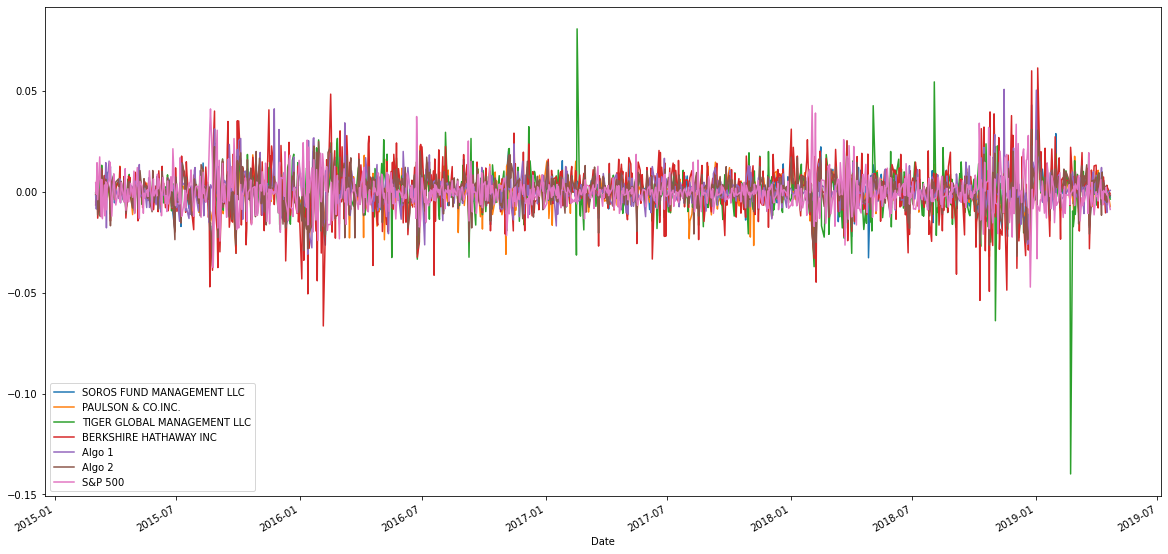

In [358]:
# Plot daily returns of all portfolios
grouped_portfolio.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [359]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ grouped_portfolio).cumprod()
cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


<AxesSubplot:xlabel='Date'>

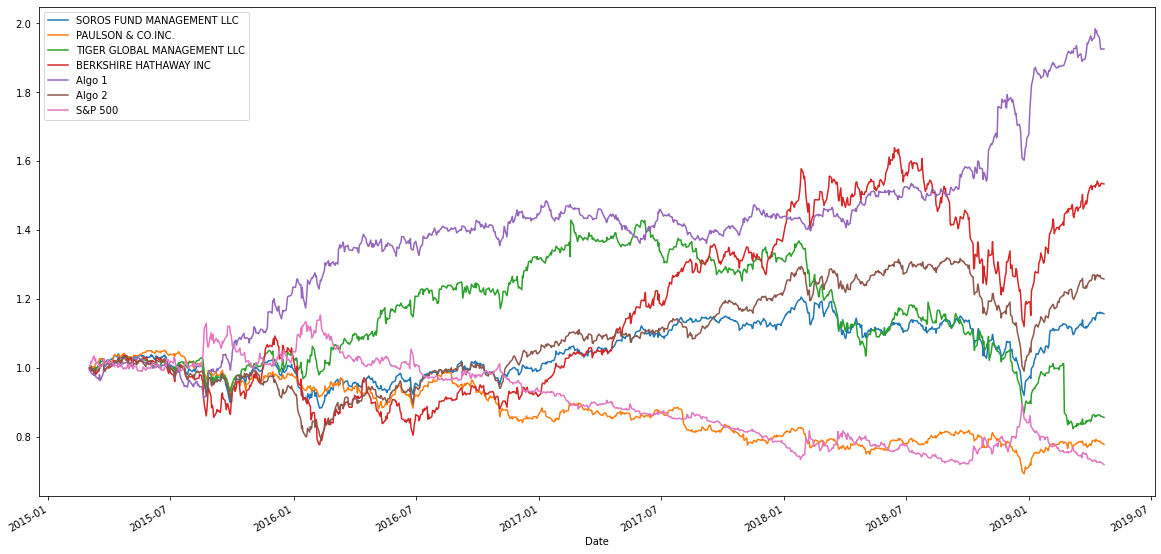

In [360]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

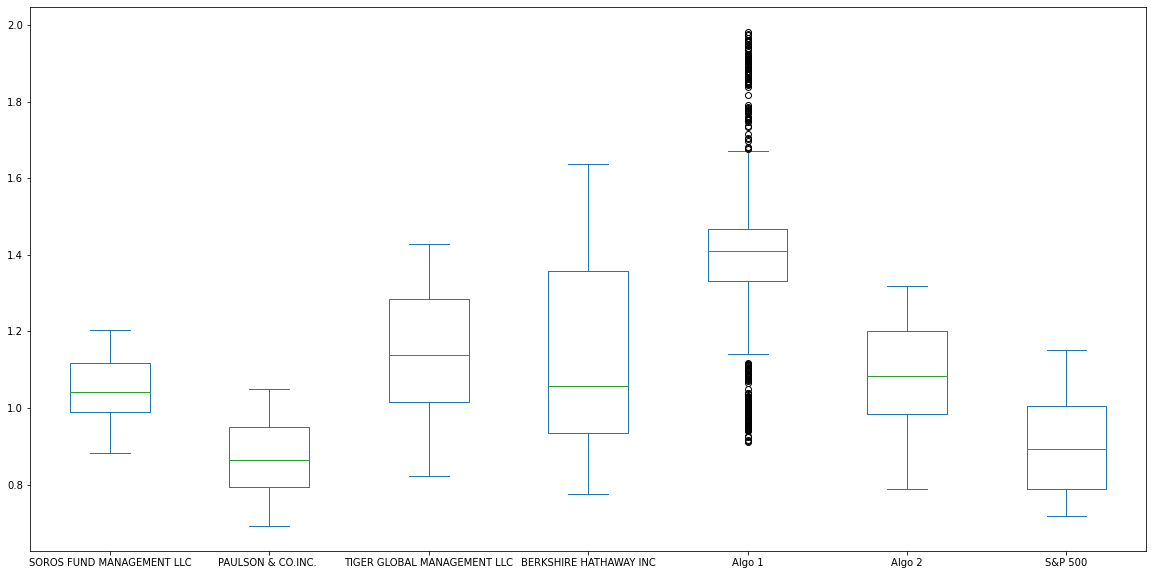

In [361]:
# Box plot to visually show risk
cumulative_returns.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [362]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = grouped_portfolio.std()
portfolio_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [363]:
# Calculate  the daily standard deviation of S&P 500
sp_500_std = sp_500_df.std()
sp_500_std
# Determine which portfolios are riskier than the S&P 500
portfolio_std = portfolio_std.sort_values(ascending=False)
portfolio_std.head(7)

#The higher the standard deviation, the more risky the portfolio. Berkshire Hathaway and Tiger global are riskier than the S&P 500. 

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [364]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

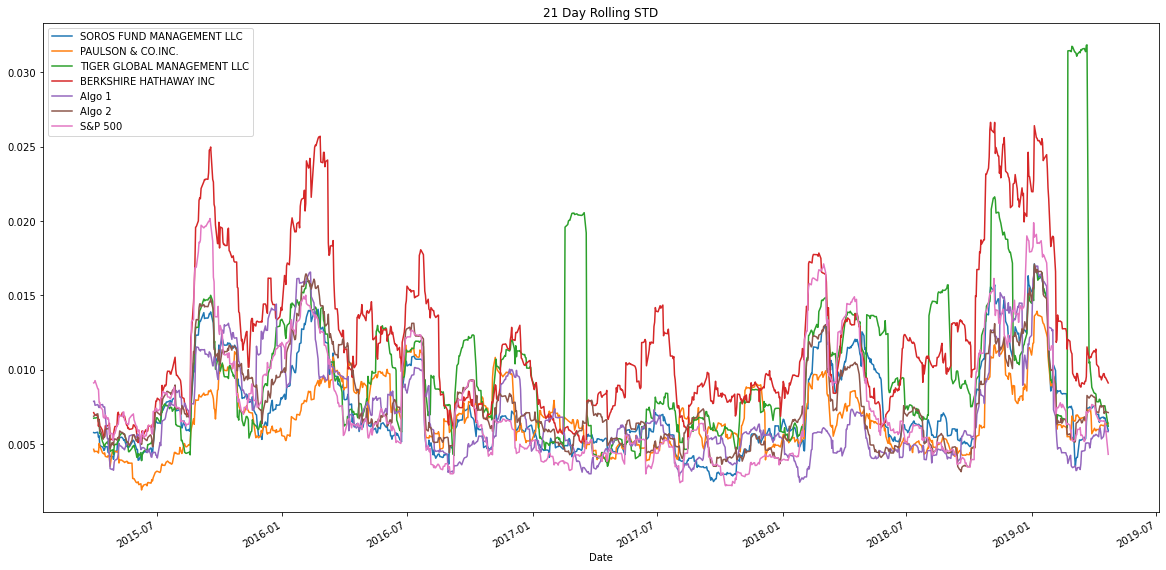

In [365]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = grouped_portfolio.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20,10), title = "21 Day Rolling STD")

### Calculate and plot the correlation

In [366]:
# Calculate the correlation
correlation = grouped_portfolio.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

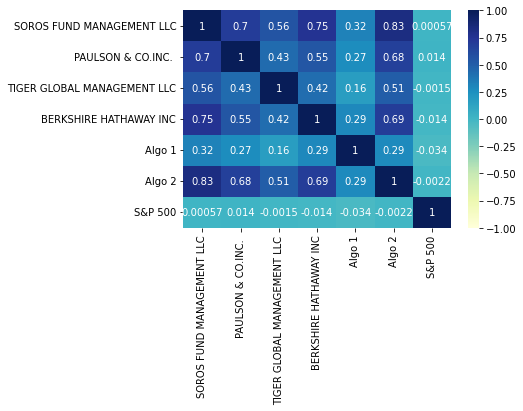

In [367]:
# Display de correlation matrix
sn.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [368]:
# Calculate covariance of a single portfolio
algo_returns_1_covariance = algo_returns_df['Algo 1'].cov(sp_500_df['S&P 500'])
algo_returns_1_covariance

-3.243204804816903e-06

In [369]:
# Calculate variance of S&P 500
variance = sp_500_df['S&P 500'].var()
variance


6.617241051948291e-05

In [370]:
# Computing beta
algo_1_beta = algo_returns_1_covariance / variance
algo_1_beta

-0.04901143511859852

<AxesSubplot:title={'center':'Rolling 30 Day Covariance of Algo 1 Returns vs. S&P 500 Returns'}, xlabel='Date'>

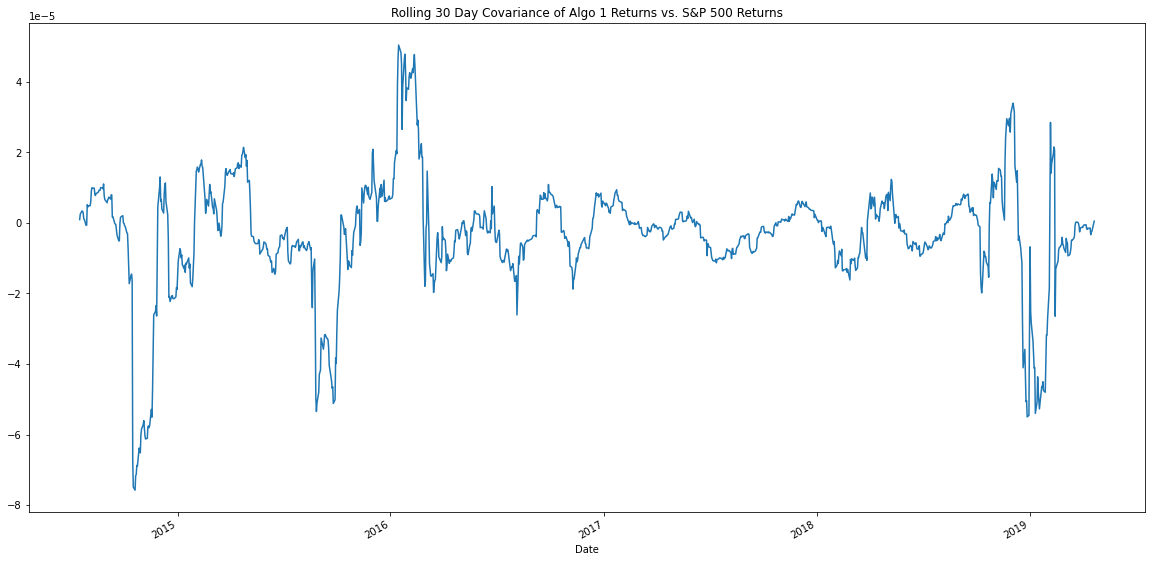

In [371]:
# Plot beta trend
rolling_covariance =  algo_returns_df['Algo 1'].rolling(window=30).cov(sp_500_df['S&P 500'])
rolling_covariance.plot(figsize=(20,10), title='Rolling 30 Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30 Day Variance of S&P 500 Returns'}, xlabel='Date'>

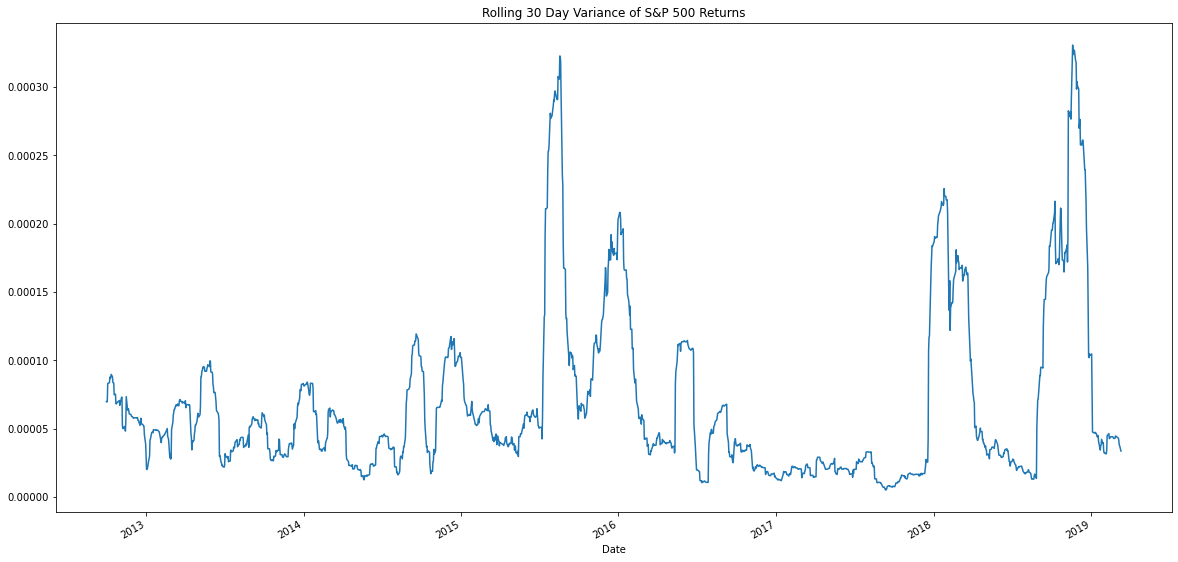

In [372]:
rolling_variance = sp_500_df['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20,10), title='Rolling 30 Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30 Day Beta of Algo 1'}, xlabel='Date'>

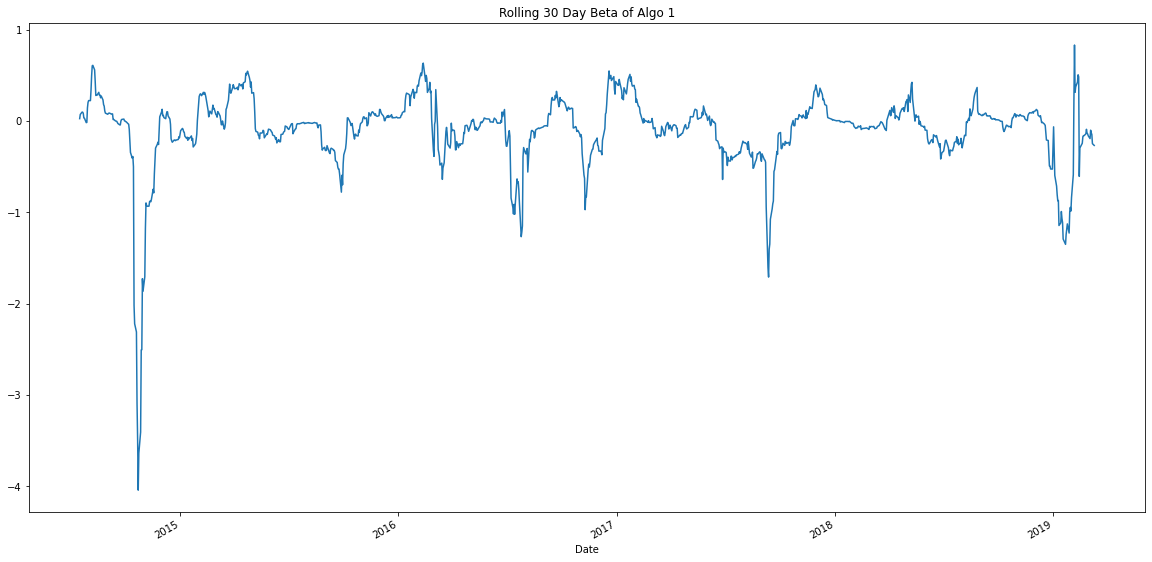

In [373]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 30 Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

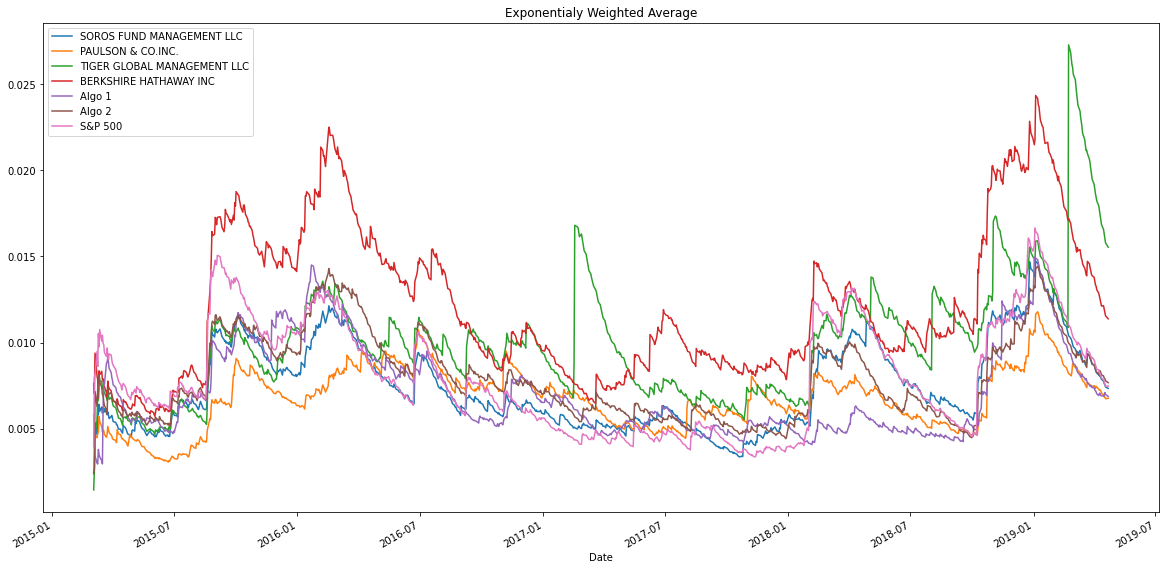

In [374]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = grouped_portfolio.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [375]:
# Annualized Sharpe Ratios
sharpe_ratios = (grouped_portfolio.mean() * 252) / (grouped_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

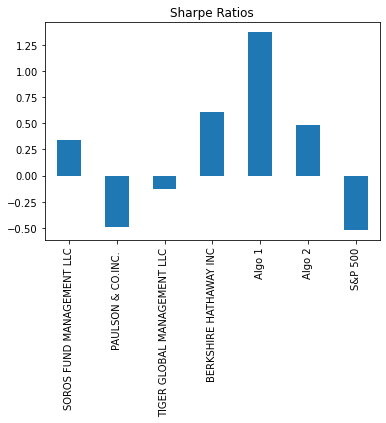

In [376]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

According to the data, Algo 1 outperforms both the market and the whale portfolios. Algo 2 outperforms the market and all of the whale portfolios except for Berkshire Hathaway. The Sharpe ratio is used to understand the return of an investmest compared to its risk.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [425]:
# Reading data from 1st stock
axsm_stock_data = Path("Custom_stocks/axsm_stock_data - Sheet1 (4).csv")
axsm_df = pd.read_csv(axsm_stock_data, infer_datetime_format=True, parse_dates=True)
axsm_df.set_index(
    pd.to_datetime(axsm_df['Date'])
    , inplace=True
    )
axsm_df.drop("Date", axis=1, inplace=True)
axsm_df.rename(columns={'Close' : 'AXSM'},inplace=True)
axsm_df.head()

,AXSM
Date,
2018-01-02,5.48
2018-01-03,5.30
2018-01-04,5.55
2018-01-05,5.60
2018-01-08,5.55


In [424]:
# Reading data from 2nd stock
boot_stock_data = Path("Custom_stocks/boot_stock_data - Sheet1 (2).csv")
boot_df = pd.read_csv(boot_stock_data)
boot_df.set_index(
    pd.to_datetime(boot_df['Date'], infer_datetime_format=True)
    , inplace=True
)
boot_df.drop("Date", axis=1, inplace=True)
boot_df.rename(columns={'Close' : 'BOOT'},inplace=True)
boot_df.head()

,BOOT
Date,
2018-01-02,17.33
2018-01-03,17.26
2018-01-04,17.06
2018-01-05,16.94
2018-01-08,17.97


In [426]:
# Reading data from 3rd stock
dq_stock_data = Path("Custom_stocks\dq_stock_data - Sheet1 (3).csv")
dq_df = pd.read_csv(dq_stock_data)
dq_df.set_index(
    pd.to_datetime(dq_df['Date'], infer_datetime_format=True)
    , inplace=True
)
dq_df.drop("Date", axis=1, inplace=True)
dq_df.rename(columns={'Close' : 'DQ'},inplace=True)
dq_df.head()

,DQ
Date,
2018-01-02,12.51
2018-01-03,12.63
2018-01-04,12.50
2018-01-05,12.96
2018-01-08,11.17


In [427]:
# Reading data from 4th stock
ever_stock_data = Path("Custom_stocks\ever_stock_data  - Sheet1 (1).csv")
ever_df = pd.read_csv(ever_stock_data, infer_datetime_format=True, parse_dates=True, index_col="Date")
ever_df.rename(columns={'Close' : 'EVER'},inplace=True)
ever_df.head()

,EVER
Date,
2018-06-28,18.02
2018-06-29,18.12
2018-07-02,18.01
2018-07-03,18.69
2018-07-05,17.88


In [422]:
# Reading data from 5th stock
modn_stock_data = Path("Custom_stocks\modn_stock_data - Sheet1 (2).csv")
modn_df = pd.read_csv(modn_stock_data)
modn_df.set_index(
    pd.to_datetime(modn_df['Date'], infer_datetime_format=True)
    , inplace=True
)
modn_df.drop("Date", axis=1, inplace=True)
modn_df.rename(columns={'Close' : 'MODN'},inplace=True)
modn_df.head()

,MODN
Date,
2018-01-02,15.30
2018-01-03,15.50
2018-01-04,15.65
2018-01-05,15.60
2018-01-08,15.55


In [428]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([axsm_df, boot_df, dq_df, ever_df, modn_df], axis="columns", join="inner")
custom_portfolio

,AXSM,BOOT,DQ,EVER,MODN
Date,,,,,
2018-06-28,3.25,21.52,7.10,18.02,18.25
2018-06-29,3.20,20.75,7.11,18.12,18.60
2018-07-02,3.15,21.32,7.28,18.01,18.40
2018-07-03,3.25,21.65,7.42,18.69,18.55
2018-07-05,3.25,22.10,7.74,17.88,18.80
...,...,...,...,...,...
2019-12-24,102.98,44.53,10.33,35.55,35.36
2019-12-26,106.24,44.40,10.30,36.46,35.68
2019-12-27,101.98,43.27,10.33,34.76,35.48


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [430]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio.pct_change()
custom_portfolio_returns
# Drop NAs
custom_portfolio_returns = custom_portfolio_returns.dropna().copy()
# Display sample data
custom_portfolio_returns

,AXSM,BOOT,DQ,EVER,MODN
Date,,,,,
2018-06-29,-0.015385,-0.035781,0.001408,0.005549,0.019178
2018-07-02,-0.015625,0.027470,0.023910,-0.006071,-0.010753
2018-07-03,0.031746,0.015478,0.019231,0.037757,0.008152
2018-07-05,0.000000,0.020785,0.043127,-0.043339,0.013477
2018-07-06,-0.015385,0.055204,-0.003876,-0.010067,0.002660
...,...,...,...,...,...
2019-12-24,0.042941,0.010667,0.011753,0.019793,0.001984
2019-12-26,0.031657,-0.002919,-0.002904,0.025598,0.009050
2019-12-27,-0.040098,-0.025450,0.002913,-0.046626,-0.005605


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [431]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
custom_weighted_returns = custom_portfolio_returns.dot(weights)
# Display sample data
custom_weighted_returns.head()


Date
2018-06-29   -0.005006
2018-07-02    0.003786
2018-07-03    0.022473
2018-07-05    0.006810
2018-07-06    0.005707
dtype: float64

In [432]:
custom_weighted_returns = custom_weighted_returns.rename("Custom")
custom_weighted_returns

Date
2018-06-29   -0.005006
2018-07-02    0.003786
2018-07-03    0.022473
2018-07-05    0.006810
2018-07-06    0.005707
                ...   
2019-12-24    0.017428
2019-12-26    0.012096
2019-12-27   -0.022974
2019-12-30    0.001887
2019-12-31    0.000351
Name: Custom, Length: 379, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [433]:
# Join your returns DataFrame to the original returns DataFrame
grouped_portfolio_2 = pd.concat([grouped_portfolio, custom_weighted_returns], axis="columns", join="inner")
grouped_portfolio_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-06-29,-0.000693,-0.002212,0.000540,0.000917,0.002802,0.001937,-0.003059,-0.005006
2018-07-02,0.000150,0.002083,-0.006130,0.006801,-0.000747,0.002093,0.004972,0.003786
2018-07-03,0.000753,-0.001749,0.003853,-0.006876,0.000060,0.005307,-0.008547,0.022473
2018-07-05,0.006601,0.005280,0.014716,0.008481,-0.003566,0.007693,-0.008410,0.006810
2018-07-06,0.012643,0.009595,0.007423,0.014642,-0.000731,0.005459,-0.008746,0.005707
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.018108
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.025806
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003352


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [434]:
# Calculate the annualized `std`
annualized_std_2 = grouped_portfolio_2 * np.sqrt(252)
annualized_std_2.head(8)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-06-29,-0.010994,-0.035119,0.008571,0.014555,0.044479,0.030754,-0.048554,-0.079466
2018-07-02,0.002385,0.033071,-0.097304,0.107969,-0.011859,0.033220,0.078927,0.060106
2018-07-03,0.011955,-0.027762,0.061160,-0.109149,0.000956,0.084248,-0.135681,0.356745
2018-07-05,0.104791,0.083810,0.233608,0.134626,-0.056609,0.122126,-0.133504,0.108106
2018-07-06,0.200706,0.152317,0.117830,0.232438,-0.011608,0.086666,-0.138836,0.090597
2018-07-09,0.137790,0.083434,0.007788,0.070713,0.174723,0.087513,-0.054945,0.009116
2018-07-10,0.000155,-0.026860,0.007252,-0.114838,-0.057786,-0.062363,0.113421,-0.284321
2018-07-11,-0.110565,-0.160371,-0.095884,-0.109123,0.031505,-0.118464,-0.137682,-0.191048


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling STD'}, xlabel='Date'>

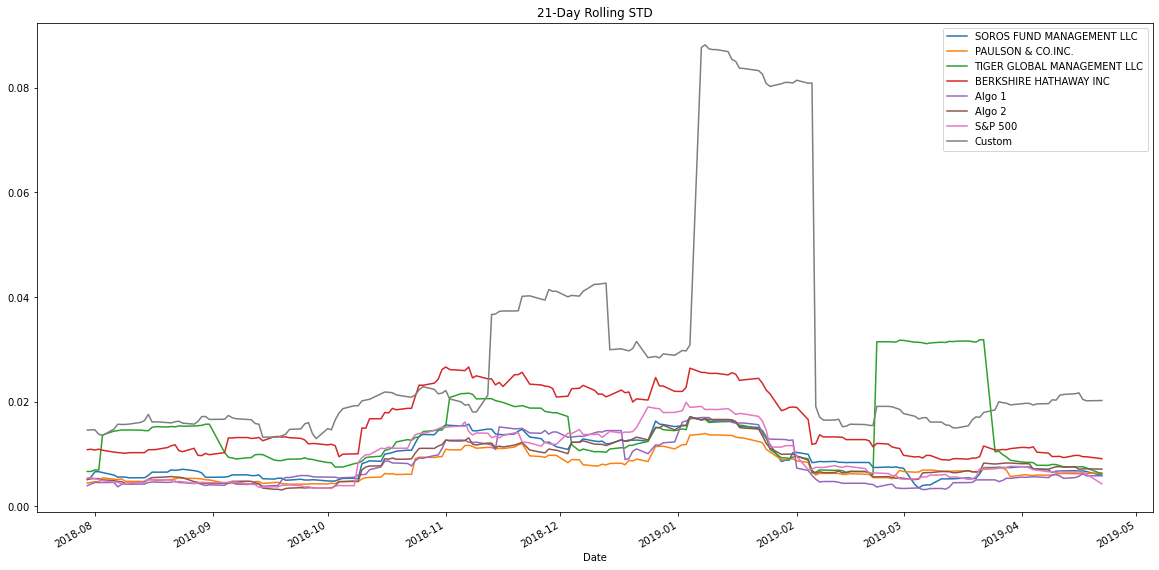

In [437]:
# Calculate rolling standard deviation
rolling_std_2 = grouped_portfolio_2.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_2.plot(figsize=(20,10), title="21-Day Rolling STD")

### Calculate and plot the correlation

In [438]:
# Calculate and plot the correlation
correlation_2 = grouped_portfolio_2.corr()
correlation_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.798523,0.471854,0.819449,0.373334,0.867754,-0.057101,0.353214
PAULSON & CO.INC.,0.798523,1.000000,0.483007,0.665282,0.397662,0.794813,-0.080355,0.383258
TIGER GLOBAL MANAGEMENT LLC,0.471854,0.483007,1.000000,0.321517,0.137904,0.402638,-0.021922,0.118606
BERKSHIRE HATHAWAY INC,0.819449,0.665282,0.321517,1.000000,0.364119,0.781832,-0.057469,0.365270
Algo 1,0.373334,0.397662,0.137904,0.364119,1.000000,0.418714,-0.041971,0.247072
Algo 2,0.867754,0.794813,0.402638,0.781832,0.418714,1.000000,-0.074540,0.457737
S&P 500,-0.057101,-0.080355,-0.021922,-0.057469,-0.041971,-0.074540,1.000000,-0.106233
Custom,0.353214,0.383258,0.118606,0.365270,0.247072,0.457737,-0.106233,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [440]:
# Calculate and plot Beta
custom_covariance = grouped_portfolio_2['Custom'].cov(sp_500_df['S&P 500'])
custom_covariance

-3.720493407966046e-05

In [441]:
custom_beta = custom_covariance / variance
custom_beta

-0.5622423875386305

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Custom Portfolio'}, xlabel='Date'>

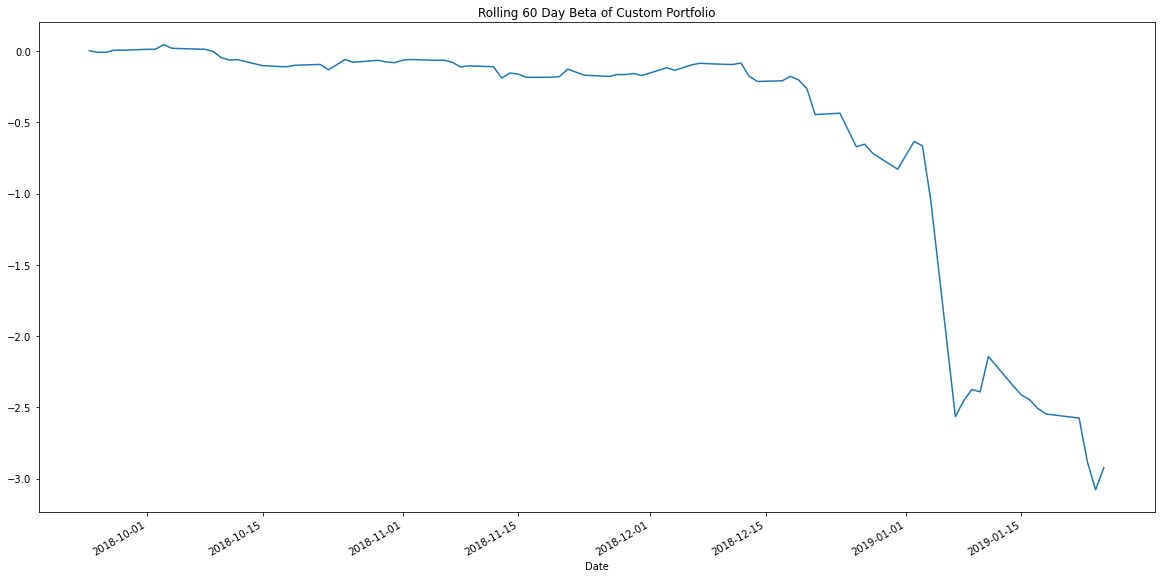

In [442]:
rolling_covariance_2 =  grouped_portfolio_2['Custom'].rolling(window=60).cov(sp_500_df['S&P 500'])
rolling_variance_2 = sp_500_df['S&P 500'].rolling(window=60).var()
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2
rolling_beta_2.plot(figsize=(20,10), title='Rolling 60 Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [443]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (grouped_portfolio_2.mean() * 252) / (grouped_portfolio_2.std() * np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.426972
PAULSON & CO.INC.              0.015493
TIGER GLOBAL MANAGEMENT LLC   -1.401449
BERKSHIRE HATHAWAY INC         0.059596
Algo 1                         2.143035
Algo 2                        -0.023501
S&P 500                       -0.511279
Custom                         1.237295
dtype: float64

<AxesSubplot:>

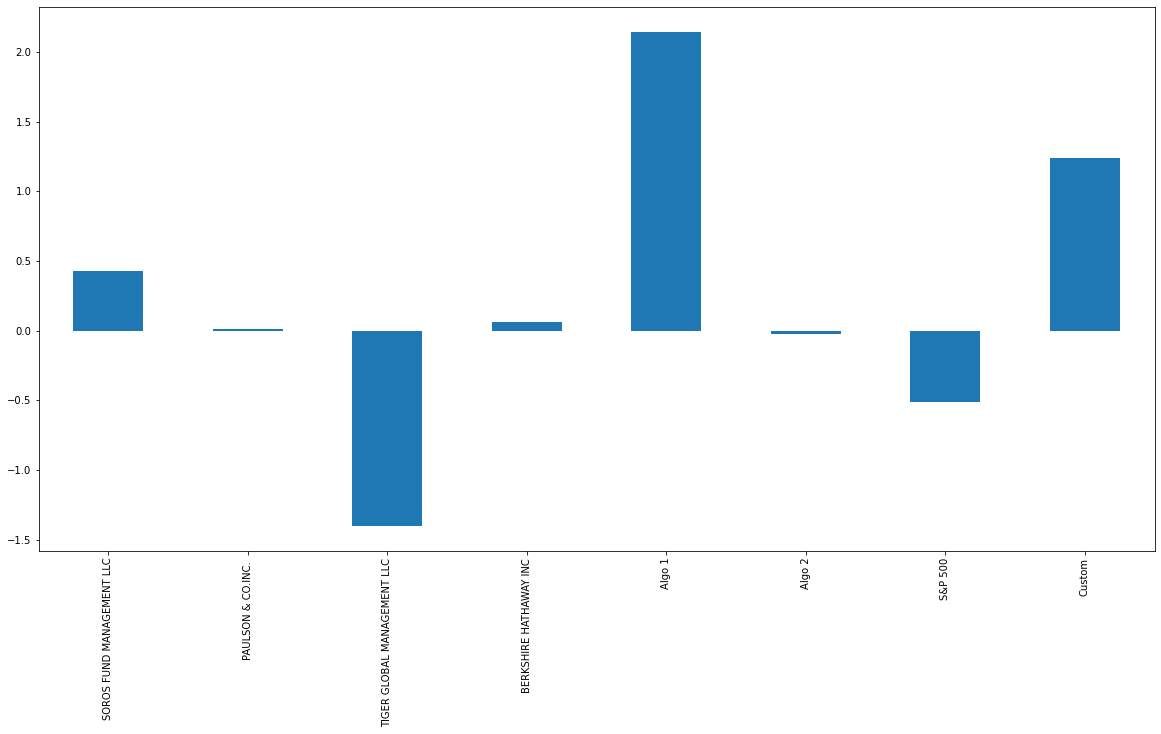

In [444]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", figsize=(20,10))

### How does your portfolio do?

Write your answer here!

My portfolio outperformed all of the S&P 500 and all of the other portfolios besides Algo 1. Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. Therefore, the higher the Sharpe Ratio, the better a fund's returns have been relative to the risk it has taken on. Taking this in to effect, my portfolio with a Sharpe ratio of 1.237295, performed fairly well when comparing returns to risk taken on.